In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AveragePooling2D
from tensorflow.keras import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout

In [ ]:
def LeNet5():
  lenet = tf.keras.Sequential()
  lenet.add(Conv2D(6,(5,5), activation='tanh', padding='valid', input_shape=(32, 32, 1)))  # C1
  lenet.add(AveragePooling2D((2,2)))                                                     # S2
  lenet.add(Conv2D(16,(5,5), activation='tanh', padding='valid'))                        # C3
  lenet.add(AveragePooling2D((2,2)))                                                     # S4
  lenet.add(Conv2D(120,(5,5), activation='tanh', padding='valid'))                       # C5
  lenet.add(Flatten())  
  lenet.add(Dense(84, activation='tanh'))                                                # F6
  lenet.add(Dense(10, activation='softmax'))                                             # OutLayer
  lenet.summary()
  return lenet

In [ ]:
# 데이터 전처리

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train.shape
#x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

(60000, 28, 28)

In [ ]:
# 3차원 배열 -> 4차원 배열

x_train = x_train.reshape(-1, 28, 28, 1)   #x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)     #x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train.shape

(60000, 28, 28, 1)

In [ ]:
# 28 x 28 -> 32 x 32

x_train = np.pad(x_train, ((0, 0), (2,2), (2,2), (0,0)),'constant')
x_test = np.pad(x_test, ((0, 0), (2,2), (2,2), (0,0)),'constant')

x_train.shape

(60000, 32, 32, 1)

In [ ]:
# 원-핫 인코딩

y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

y_train_encoded.shape

(60000, 10)

In [ ]:
model = LeNet5()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train_encoded, epochs=20, validation_split=0.2)  # default: batch_size = 32, verbose = 1

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_3 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 84)               

In [ ]:
loss,accuracy =model.evaluate(x_test, y_test_encoded)
print('loss:{}, accuracy:{}'.format(loss, accuracy))

313/313 [==============================] - 3s 9ms/step - loss: 0.2966 - accuracy: 0.9000
loss:0.2965649664402008, accuracy:0.8999999761581421


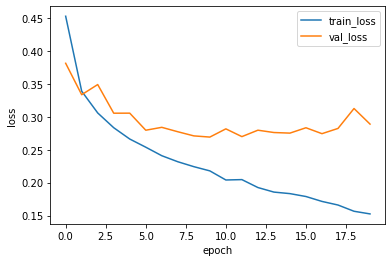

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

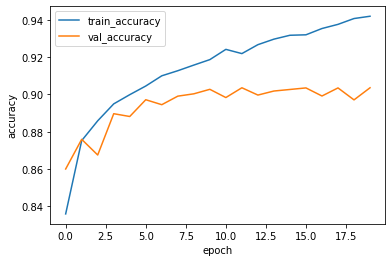

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
#과대 적합 현상을 해결하기 위한 Dropout 적용

def LeNet5_DropOut():
  lenet = tf.keras.Sequential()
  lenet.add(Conv2D(6,(5,5), activation='tanh', padding='valid', input_shape=(32, 32, 1)))  # C1
  lenet.add(AveragePooling2D((2,2)))                                                     # S2
  lenet.add(Conv2D(16,(5,5), activation='tanh', padding='valid'))                        # C3
  lenet.add(AveragePooling2D((2,2)))                                                     # S4
  lenet.add(Conv2D(120,(5,5), activation='tanh', padding='valid'))                       # C5
  lenet.add(Flatten())  
  lenet.add(Dropout(0.5))
  lenet.add(Dense(84, activation='tanh'))                                                # F6
  lenet.add(Dense(10, activation='softmax'))                                             # OutLayer
  lenet.summary()
  return lenet

In [ ]:
model2 = LeNet5_DropOut()
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model2.fit(x_train, y_train_encoded, epochs=20, validation_split=0.2)  # default: batch_size = 32, verbose = 1

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_8 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_9 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_4 (Flatten)          (None, 120)               0         
_________________________________________________________________
dropout (Dropout)            (None, 120)              

In [ ]:
loss,accuracy =model.evaluate(x_test, y_test_encoded)
print('loss:{}, accuracy:{}'.format(loss, accuracy))

313/313 [==============================] - 3s 9ms/step - loss: 0.2966 - accuracy: 0.9000
loss:0.2965649664402008, accuracy:0.8999999761581421


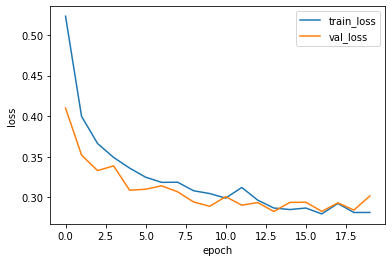

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

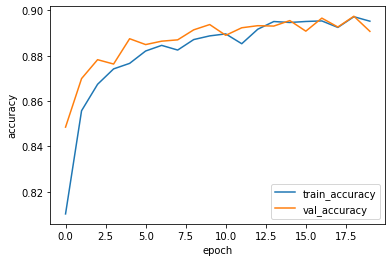

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()